In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### About the dataset

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df["Sex"]=df["Sex"].astype("category")

In [14]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

In [15]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [19]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
df.drop("Cabin",axis=1,inplace=True)

In [23]:
df.dropna(inplace=True)

In [24]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Distribution Plot

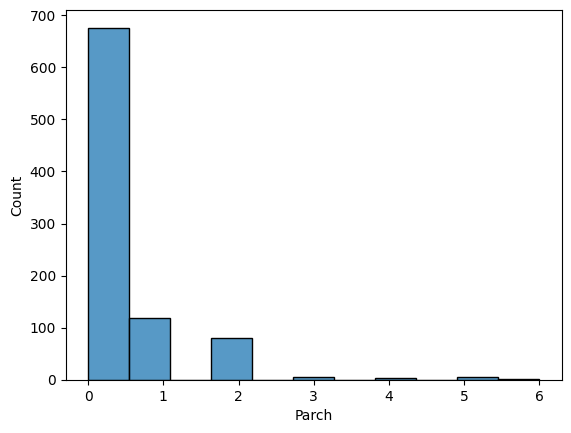

In [35]:
# The histogram of Number of parents and children of the passenger
sns.histplot(df['Parch'])
plt.show();

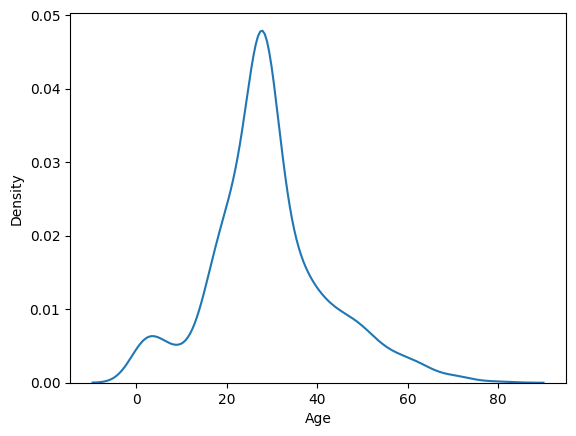

In [43]:
sns.kdeplot(df['Age'])
plt.show();

### Relational Plot

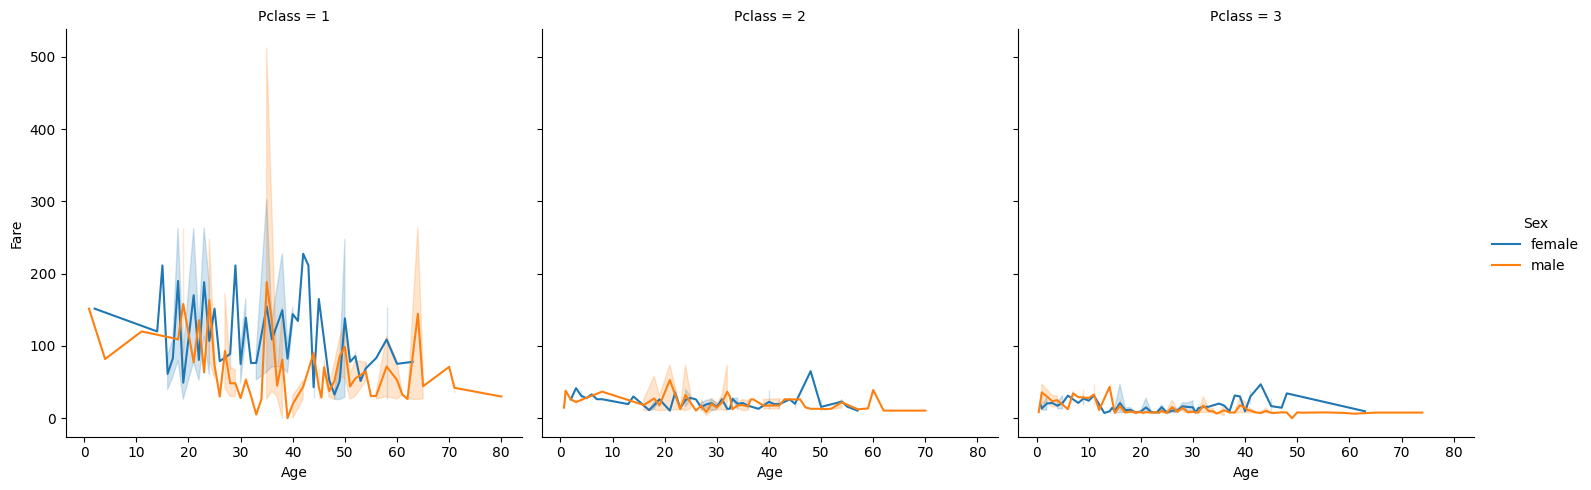

In [54]:
sns.relplot(x="Age", y="Fare", col="Pclass",hue="Sex",kind="line", data=df)
plt.show()

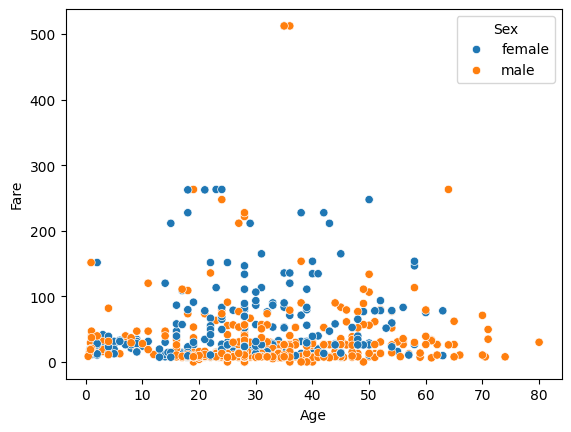

In [53]:
sns.scatterplot(x="Age", y="Fare",hue="Sex", data=df)
plt.show()

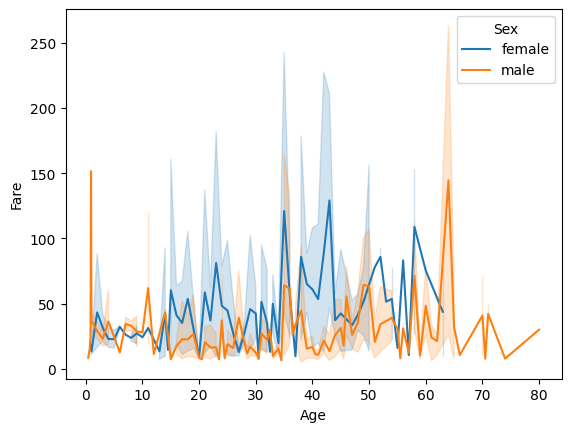

In [56]:
sns.lineplot(x="Age", y="Fare", hue="Sex", data=df)
plt.show()

### Categorical Plot

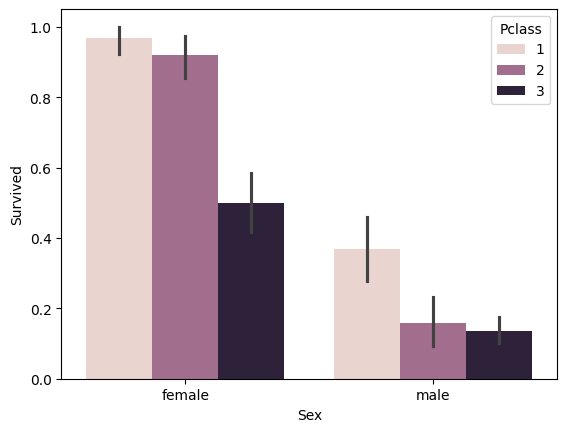

In [61]:
sns.barplot(x="Sex",y="Survived",hue="Pclass",data=df)
plt.show();

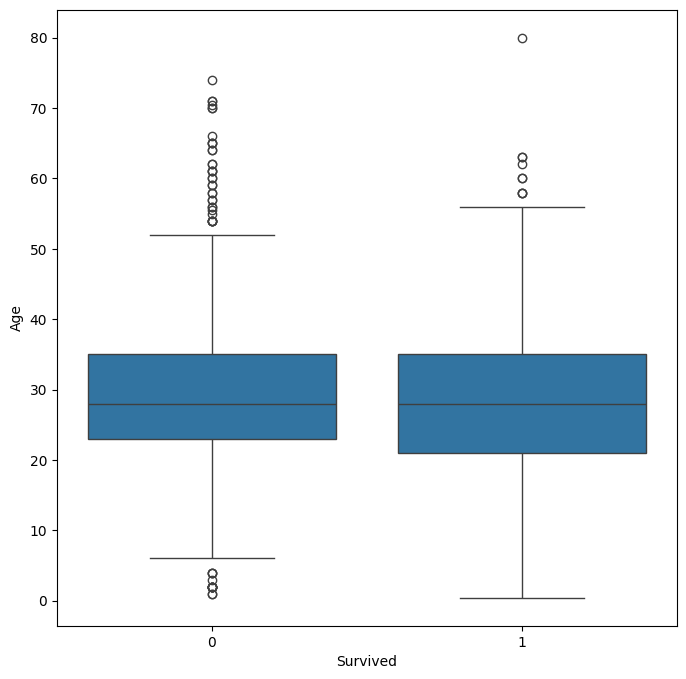

In [64]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Survived", y="Age", data=df)
plt.show();

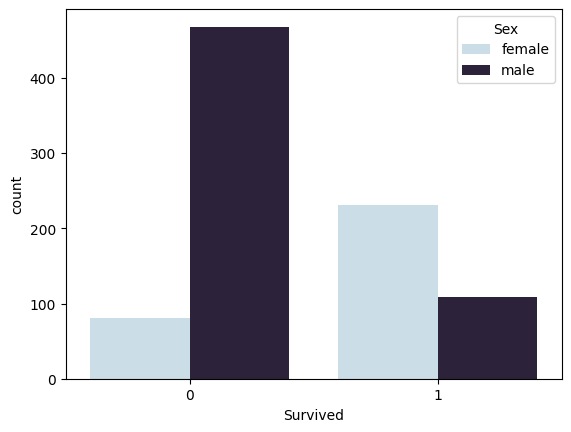

In [74]:
sns.countplot(x="Survived", data=df, hue="Sex",palette="ch:s=.25,rot=-.25");
plt.show();

In [88]:
fare=df.groupby(["Pclass"])["Fare"].mean()
print(fare)

Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [94]:
survival_count=df.groupby(["Pclass","Sex"],observed=True)["Survived"].count()
print(survival_count)

Pclass  Sex   
1       female     92
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Survived, dtype: int64
